In [ ]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, timedelta,date
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Limpieza inicial sobre el csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/MESES_hasta_201404.zip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,47,81,83) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# Filtro los 3 últimos meses
df2=df[df.foto_mes > 201401]
df2.head()

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,...,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo
5,3333,201403,.,0,455,0,0,16109631.53,-1.253631e+08,2362829.57,-2333351.97,14082755.35,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.0,N,0,0.00,N,...,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.
6,3333,201403,.,0,455,0,0,1450087.77,-4.760275e+06,966073.49,-268864.73,682552.15,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.0,N,0,0.00,N,...,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.
7,3333,201404,0,0,455,0,0,-1351755.68,-1.069960e+07,276455.04,-885610.15,-506022.95,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.0,N,0,0.00,N,...,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.
8,3333,201404,0,0,455,0,0,2451895.62,-1.524554e+08,-569108.17,8590493.45,-6008438.92,0,S,N,N,N,N,N,N,N,N,N,N,0.0,0.0,0.0,N,0.00,0.0,0.0,0.00,0.00,N,0,0.0,N,0,0.00,N,...,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.
22,5609788,201402,0,0,224,61,237,0.00,9.669420e+03,0.00,0.00,0.00,8,S,N,N,N,N,N,N,N,N,S,S,0.0,0.0,0.0,S,2306.92,0.0,0.0,1.17,1214.93,S,0,0.0,S,12,5488.64,S,...,NaN,5930,5930,0,0,0,96162.31,0,0,20140213,5930,-2696.97,0,20010227,0,N,N,3006.9,0,10,87488.34,20220331,NaN,4765.27,5575.36,0,377.24,0,97211.31,0,0,20140227,0,-20743.77,1467.03,19970317,377.24,S,N,3229.2


In [ ]:
# Creo un lag (lo voy a usar para crear la variable objetivo)
df2['Mes_1'] = df2.groupby(['numero_de_cliente'])['foto_mes'].shift(-1)
df2['Mes_2'] = df2.groupby(['numero_de_cliente'])['foto_mes'].shift(-2)

In [ ]:
# Despues de crear el lag puedo descartar foto_mes > 201402
df2=df2[df2.foto_mes == 201402]

In [ ]:
#Verifico el formato de la tabla
df2[['numero_de_cliente', 'foto_mes', 'Mes_1', 'Mes_2']].head(20)

,numero_de_cliente,foto_mes,Mes_1,Mes_2
22,5609788,201402,201403.0,201404.0
38,5609981,201402,201403.0,201404.0
54,5610023,201402,201403.0,201404.0
70,5610089,201402,201403.0,201404.0
86,5610101,201402,201403.0,201404.0
102,5610189,201402,201403.0,201404.0
106,5610328,201402,201403.0,201404.0
122,5610521,201402,201403.0,201404.0
138,5610637,201402,201403.0,201404.0
154,5610791,201402,201403.0,201404.0


In [ ]:
df2['target'] = "Baja+1"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2.loc[(df2['Mes_1']==201403), 'target'] = "Baja+2"

In [ ]:
df2.loc[(df2['Mes_2']==201404), 'target'] = "Continua"

In [ ]:
df2['target_bin'] = np.where(df2['target']=='Baja+2', 1, 0)

In [ ]:
df2[df2['target']=='Baja+2'] 

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,...,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,Mes_1,Mes_2,target,target_bin
1420,5620030,201402,0,0,113,55,237,0.00,16293.40,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,S,N,0.0,0.00,0.0,S,0.00,68099.07,0.00,0.00,66733.67,S,2,418.86,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
1816,5622530,201402,0,1,1076,0,96,239.66,0.00,0.0,0.0,0.0,10,S,N,N,N,N,N,N,N,N,S,S,0.0,-492.40,0.0,S,0.00,0.00,0.00,1.17,5787.08,S,0,0.00,S,0,0.00,S,...,.,.,8775,.,.,20140220,0,.,.,20120210,.,S,S,0,0,10,11056.5,20150228,NaN,0,0,0,.,.,12285,.,.,20140220,0,.,.,20120210,.,S,S,0,201403.0,NaN,Baja+2,1
8411,5670807,201402,0,0,203,51,237,0.00,1850.50,0.0,0.0,0.0,8,S,N,N,N,N,N,S,N,N,S,S,0.0,-565.51,0.0,S,4361.17,0.00,4.97,1.17,14414.56,S,15,2108.32,S,9,1946.02,S,...,.,.,24570,.,.,20140213,0,.,.,20000627,.,S,S,0,0,10,22113,20160430,NaN,1677.08,1962.18,0,1038.31,0,24570,0,0,20140227,0,-2620.37,0,19980403,1038.31,S,N,93.6,201403.0,NaN,Baja+2,1
16601,5734492,201402,0,1,98,57,290,0.00,144.68,0.0,0.0,0.0,3,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
37960,5877622,201402,0,0,398,66,194,0.00,16136.95,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,N,N,0.0,0.00,0.0,N,0.00,0.00,0.00,0.00,428209.69,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692707,47799016,201402,0,0,1349,50,4,0.00,1331.54,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,-4348.59,0.0,S,0.00,0.00,0.00,1.17,0.00,S,0,0.00,S,0,0.00,S,...,.,.,12285,.,.,20140227,0,.,.,20131111,.,S,S,0,0,10,12636,20161130,NaN,0,0,0,.,.,14040,.,.,20140227,0,.,.,20131111,.,S,S,0,201403.0,NaN,Baja+2,1
2692795,47830382,201402,0,0,677,0,4,620.49,0.00,0.0,0.0,0.0,6,S,N,N,N,N,N,N,N,N,S,S,0.0,-68.39,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,0,12,9477,20161130,NaN,0,0,0,.,.,10530,.,.,20140220,0,.,.,20131119,.,S,S,0,201403.0,NaN,Baja+2,1
2693356,48048469,201402,0,0,677,0,4,544.42,0.00,0.0,0.0,0.0,6,S,N,N,N,N,N,N,N,N,S,S,0.0,-428.14,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,0,12,9477,20161130,NaN,0,0,0,.,.,10530,.,.,20140220,0,.,.,20131114,.,S,S,0,201403.0,NaN,Baja+2,1
2694133,483

In [ ]:
df2[df2['target_bin']==1] 

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,...,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,Mes_1,Mes_2,target,target_bin
1420,5620030,201402,0,0,113,55,237,0.00,16293.40,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,S,N,0.0,0.00,0.0,S,0.00,68099.07,0.00,0.00,66733.67,S,2,418.86,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
1816,5622530,201402,0,1,1076,0,96,239.66,0.00,0.0,0.0,0.0,10,S,N,N,N,N,N,N,N,N,S,S,0.0,-492.40,0.0,S,0.00,0.00,0.00,1.17,5787.08,S,0,0.00,S,0,0.00,S,...,.,.,8775,.,.,20140220,0,.,.,20120210,.,S,S,0,0,10,11056.5,20150228,NaN,0,0,0,.,.,12285,.,.,20140220,0,.,.,20120210,.,S,S,0,201403.0,NaN,Baja+2,1
8411,5670807,201402,0,0,203,51,237,0.00,1850.50,0.0,0.0,0.0,8,S,N,N,N,N,N,S,N,N,S,S,0.0,-565.51,0.0,S,4361.17,0.00,4.97,1.17,14414.56,S,15,2108.32,S,9,1946.02,S,...,.,.,24570,.,.,20140213,0,.,.,20000627,.,S,S,0,0,10,22113,20160430,NaN,1677.08,1962.18,0,1038.31,0,24570,0,0,20140227,0,-2620.37,0,19980403,1038.31,S,N,93.6,201403.0,NaN,Baja+2,1
16601,5734492,201402,0,1,98,57,290,0.00,144.68,0.0,0.0,0.0,3,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
37960,5877622,201402,0,0,398,66,194,0.00,16136.95,0.0,0.0,0.0,2,S,N,N,N,N,N,N,N,N,N,N,0.0,0.00,0.0,N,0.00,0.00,0.00,0.00,428209.69,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,.,.,.,.,NaN,.,.,.,.,.,.,.,.,.,.,.,.,.,.,S,S,.,201403.0,NaN,Baja+2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692707,47799016,201402,0,0,1349,50,4,0.00,1331.54,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,-4348.59,0.0,S,0.00,0.00,0.00,1.17,0.00,S,0,0.00,S,0,0.00,S,...,.,.,12285,.,.,20140227,0,.,.,20131111,.,S,S,0,0,10,12636,20161130,NaN,0,0,0,.,.,14040,.,.,20140227,0,.,.,20131111,.,S,S,0,201403.0,NaN,Baja+2,1
2692795,47830382,201402,0,0,677,0,4,620.49,0.00,0.0,0.0,0.0,6,S,N,N,N,N,N,N,N,N,S,S,0.0,-68.39,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,0,12,9477,20161130,NaN,0,0,0,.,.,10530,.,.,20140220,0,.,.,20131119,.,S,S,0,201403.0,NaN,Baja+2,1
2693356,48048469,201402,0,0,677,0,4,544.42,0.00,0.0,0.0,0.0,6,S,N,N,N,N,N,N,N,N,S,S,0.0,-428.14,0.0,S,0.00,0.00,0.00,0.00,0.00,S,0,0.00,N,0,0.00,N,...,.,.,.,.,.,.,.,.,.,.,.,S,S,.,0,12,9477,20161130,NaN,0,0,0,.,.,10530,.,.,20140220,0,.,.,20131114,.,S,S,0,201403.0,NaN,Baja+2,1
2694133,483

In [ ]:
df2['target_bin'].value_counts()

0    181208
1       773
Name: target_bin, dtype: int64

In [ ]:
#Creo variables
df2['mcuenta_corriente_all'] = df2['mcuenta_corriente_Paquete'] + df2['mcuenta_corriente_Nopaquete']
df2['mcaja_ahorro_all'] = df2['mcaja_ahorro_Paquete'] + df2['mcaja_ahorro_Nopaquete']
df2['mcaja_ahorro_CC'] = df2['mcaja_ahorro_all'] + df2['mcuenta_corriente_all']
df2['mtarjeta_all_consumo'] = df2['mtarjeta_visa_consumo'] + df2['mtarjeta_master_consumo']
df2['ctarjeta_all_transacciones'] = df2['ctarjeta_visa_transacciones'] + df2['ctarjeta_master_transacciones']
df2.head()

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,...,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,Mes_1,Mes_2,target,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
22,5609788,201402,0,0,224,61,237,0.00,9669.42,0.0,0.0,0.0,8,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,2306.92,0.0,0.00,1.17,1214.93,S,0,0.00,S,12,5488.64,S,...,20140213,5930,-2696.97,0,20010227,0,N,N,3006.9,0,10,87488.34,20220331,NaN,4765.27,5575.36,0,377.24,0,97211.31,0,0,20140227,0,-20743.77,1467.03,19970317,377.24,S,N,3229.2,201403.0,201404.0,Continua,0,0.00,2306.92,2306.92,11333.44,17
38,5609981,201402,0,0,227,64,196,0.00,4107.16,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,1568.13,0.0,0.00,1.17,1061.04,S,0,0.00,S,2,706.14,S,...,20140227,0,.,.,20010309,.,S,S,0,0,10,15795,20170331,NaN,6505.05,7610.9,0,706.14,0,17550,0,0,20140227,0,-713.7,0,20010308,706.14,S,N,748.8,201403.0,201404.0,Continua,0,0.00,1568.13,1568.13,706.14,2
54,5610023,201402,0,0,536,41,91,0.00,2888.84,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,1409.87,0.0,0.00,1.17,748.50,S,2,538.20,S,9,1278.52,S,...,20140227,0,-3054.16,0,20060802,936,S,N,1649.7,0,10,87488.34,20150831,NaN,858.11,1003.98,0,361.64,0,97211.31,0,0,20140227,0,-1881.83,0,20060802,361.64,S,N,93.6,201403.0,201404.0,Continua,0,0.00,1409.87,1409.87,5295.89,20
70,5610089,201402,0,0,545,0,237,2597.43,0.00,0.0,0.0,0.0,12,S,N,N,N,N,N,N,N,N,S,S,0.0,-928.10,0.0,S,2181.47,0.0,0.00,1.17,823.96,S,0,0.00,S,10,9905.94,S,...,20140206,7571.71,-6105.3,0,20100112,7436.74,S,N,421.2,0,10,87488.34,20180131,NaN,8619.29,9624.23,460.33,6017.28,58.44,97211.31,0,0,20140227,0,-7631.25,0,20100120,6017.28,S,N,1673.1,201403.0,201404.0,Continua,0,-928.10,2181.47,1253.37,17342.68,18
86,5610101,201402,0,0,1217,49,45,0.00,46303.03,0.0,0.0,0.0,11,S,N,N,N,N,N,N,N,N,S,S,0.0,21043.29,0.0,S,38499.54,0.0,114.75,1.17,46223.92,S,9,3836.39,S,9,2755.82,S,...,20140227,0,-5076.55,0,20130626,58.38,S,N,2562.3,0,10,142554.47,20210831,NaN,2378.44,2782.77,0,1050.96,0,158401.53,0,0,20140227,0,-18960.01,1514.84,20100809,1050.96,S,N,304.2,201403.0,201404.0,Continua,0,21043.29,38499.54,59542.83,7694.85,11


In [ ]:
df2 = df2.drop(['Mes_1' , 'Mes_2'] , axis='columns')

In [ ]:
df2.head()

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,...,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
22,5609788,201402,0,0,224,61,237,0.00,9669.42,0.0,0.0,0.0,8,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,2306.92,0.0,0.00,1.17,1214.93,S,0,0.00,S,12,5488.64,S,...,0,0,20140213,5930,-2696.97,0,20010227,0,N,N,3006.9,0,10,87488.34,20220331,NaN,4765.27,5575.36,0,377.24,0,97211.31,0,0,20140227,0,-20743.77,1467.03,19970317,377.24,S,N,3229.2,Continua,0,0.00,2306.92,2306.92,11333.44,17
38,5609981,201402,0,0,227,64,196,0.00,4107.16,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,1568.13,0.0,0.00,1.17,1061.04,S,0,0.00,S,2,706.14,S,...,.,.,20140227,0,.,.,20010309,.,S,S,0,0,10,15795,20170331,NaN,6505.05,7610.9,0,706.14,0,17550,0,0,20140227,0,-713.7,0,20010308,706.14,S,N,748.8,Continua,0,0.00,1568.13,1568.13,706.14,2
54,5610023,201402,0,0,536,41,91,0.00,2888.84,0.0,0.0,0.0,9,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,1409.87,0.0,0.00,1.17,748.50,S,2,538.20,S,9,1278.52,S,...,0,0,20140227,0,-3054.16,0,20060802,936,S,N,1649.7,0,10,87488.34,20150831,NaN,858.11,1003.98,0,361.64,0,97211.31,0,0,20140227,0,-1881.83,0,20060802,361.64,S,N,93.6,Continua,0,0.00,1409.87,1409.87,5295.89,20
70,5610089,201402,0,0,545,0,237,2597.43,0.00,0.0,0.0,0.0,12,S,N,N,N,N,N,N,N,N,S,S,0.0,-928.10,0.0,S,2181.47,0.0,0.00,1.17,823.96,S,0,0.00,S,10,9905.94,S,...,0,0,20140206,7571.71,-6105.3,0,20100112,7436.74,S,N,421.2,0,10,87488.34,20180131,NaN,8619.29,9624.23,460.33,6017.28,58.44,97211.31,0,0,20140227,0,-7631.25,0,20100120,6017.28,S,N,1673.1,Continua,0,-928.10,2181.47,1253.37,17342.68,18
86,5610101,201402,0,0,1217,49,45,0.00,46303.03,0.0,0.0,0.0,11,S,N,N,N,N,N,N,N,N,S,S,0.0,21043.29,0.0,S,38499.54,0.0,114.75,1.17,46223.92,S,9,3836.39,S,9,2755.82,S,...,0,0,20140227,0,-5076.55,0,20130626,58.38,S,N,2562.3,0,10,142554.47,20210831,NaN,2378.44,2782.77,0,1050.96,0,158401.53,0,0,20140227,0,-18960.01,1514.84,20100809,1050.96,S,N,304.2,Continua,0,21043.29,38499.54,59542.83,7694.85,11


### Limpieza completa del CSV

In [ ]:
df.head()

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
0,22,5609788,201402,0,0,224,61,237,0.00,9669.42,0.0,0.0,0.0,8,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,2306.92,0.0,0.00,1.17,1214.93,S,0,0.00,S,12,5488.64,S,5,5844.80,0,0.00,0,0.0,0,0,N,0.00,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.0,0.0,0,N,0,S,225.14,N,0,N,0,N,0,0,0.00,2,0.0,0,0.0,0,0,1,328.53,5,525.66,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,S,N,S,N,N,0,0.0,0,0.0,S,0,10,86544.25,20170331,NaN,59

In [ ]:
del df['Unnamed: 0']

In [ ]:
df2 = df

In [ ]:
df = df2

In [ ]:
del df2['tpaquete_premium']

In [ ]:
df2['tpaquete2'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tpaquete2'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tpaquete3'].unique()

array(['N'], dtype=object)

In [ ]:
del df2['tpaquete3']

In [ ]:
df2['tpaquete4'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tpaquete4'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tpaquete5'].unique()

array(['N'], dtype=object)

In [ ]:
del df2['tpaquete5']

In [ ]:
df2['tpaquete6'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tpaquete6'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tpaquete7'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tpaquete7'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tpaquete8'].unique()

array(['N'], dtype=object)

In [ ]:
del df2['tpaquete8']

In [ ]:
df2['tpaquete9'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tpaquete9'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tcuentas'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['tcuentas'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df2['tcaja_ahorro'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['tcaja_ahorro'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
columnas_limpiar = pd.DataFrame(df2)
missings_columnas_limpiar = columnas_limpiar.isnull().sum() * 100 / len(columnas_limpiar)
listado_missing_columnas_limpiar = pd.DataFrame({'column_name': columnas_limpiar.columns,
                                 'missings_columnas_limpiar': missings_columnas_limpiar})
listado_missing_columnas_limpiar.sort_values('missings_columnas_limpiar', ascending = False, inplace=True)
listado_missing_columnas_limpiar.head()

,column_name,missings_columnas_limpiar
Master_Finiciomora,Master_Finiciomora,99.236184
Visa_Finiciomora,Visa_Finiciomora,99.141669
numero_de_cliente,numero_de_cliente,0.000000
mcajeros_propio,mcajeros_propio,0.000000
cautoservicio_transacciones,cautoservicio_transacciones,0.000000


In [ ]:
del df2['Master_Finiciomora']
del df2['Visa_Finiciomora']

In [ ]:
df2.head()

,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete2,tpaquete4,tpaquete6,tpaquete7,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
0,5609788,201402,0,0,224,61,237,0.00,9669.42,0.0,0.0,0.0,8,0,0,0,0,0,1,S,0.0,0.00,0.0,1,2306.92,0.0,0.00,1.17,1214.93,S,0,0.00,S,12,5488.64,S,5,5844.80,0,0.00,0,0.0,0,0,N,0.00,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.0,0.0,0,N,0,S,225.14,N,0,N,0,N,0,0,0.00,2,0.0,0,0.0,0,0,1,328.53,5,525.66,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,N,0,N,0,S,N,S,N,N,0,0.0,0,0.0,S,0,10,86544.25,20170331,5930,5930,0,0,0,96162.31,0,0,20140213,5930,-2696.97,0,20010227,0,N,N,3006.9,0,10,87488.34,20220331,4765.27,5575

In [ ]:
df2['ttarjeta_visa'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['ttarjeta_master'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['Master_tconsumos'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['Master_tadelantosefectivo'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['tcuenta_corriente'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['Visa_tconsumos'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['Visa_tadelantosefectivo'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df2['ttarjeta_visa'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df2['ttarjeta_visa'].replace({"S": 1, "N": 0}, inplace=True)
df2['ttarjeta_master'].replace({"S": 1, "N": 0}, inplace=True)
df2['Master_tconsumos'].replace({"S": 1, "N": 0}, inplace=True)
df2['Master_tadelantosefectivo'].replace({"S": 1, "N": 0}, inplace=True)
df2['tcuenta_corriente'].replace({"S": 1, "N": 0}, inplace=True)
df2['Visa_tconsumos'].replace({"S": 1, "N": 0}, inplace=True)
df2['Visa_tadelantosefectivo'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
del df2['marketing_activo_ultimos90dias']
del df2['mcomisiones']
del df2['mactivos_margen']
del df2['mpasivos_margen']
del df2['mcuenta_corriente_dolares']
del df2['mbonos_gobierno']
del df2['mmonedas_extranjeras']
del df2['minversiones_otras']
del df2['ccuenta_descuentos']
del df2['mcuenta_descuentos']
del df2['chomebanking_transacciones']
del df2['cautoservicio_transacciones']

In [ ]:
df2.shape

(181981, 158)

In [ ]:
df2.describe()

,numero_de_cliente,foto_mes,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,marketing_coss_selling,tpaquete2,tpaquete4,tpaquete6,tpaquete7,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mplazo_fijo_dolares,mplazo_fijo_pesos,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,mtitulos,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,ccallcenter_transacciones,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,Master_tconsumos,Master_tadelantosefectivo,Visa_tconsumos,Visa_tadelantosefectivo,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
count,1.819810e+05,181981.0,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.00000,181981.000000,181981.000000,181981.000000,1.819810e+05,181981.000000,1.819810e+05,181981.000000,1.819810e+05,181981.000000,1.819810e+05,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,1.819810e+05,1.819810e+05,1.819810e+05,1.819810e+05,1.819810e+05,181981.0,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,1.819810e+05,181981.000000,1.819810e+05,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,181981.000000,1.819810e+05,1.819810e+05,1.819810e+05,181981.000000,181981.000000
mean,2.114644e+07,201402.0,0.028695,554.443816,42.782351,119.048181,141.154399,6605.207343,9.006990,0.015579,0.003621,0.000506,0.024860,0.02248,0.992406,0.966782,60.627804,8.310604e+02,0.992241,1.695211e+04,381.580838,4.178486e+03,1.106531,2.554148e+04,5.177716,2422.753100,0.938538,13.942137,5153.372915,0.856342,3.888356,1656.629983,0.798045,13893.997331,0.029877,2189.701911,0.036449,1.732227e+04,1.803649e+03,1.919651e+03,5.007695e+01,9.834504e+03,0.0,14.006272,0.000247,0.484759,78.874009,0.279035,12.079401,0.111330,4.157595,0.788478,145.268338,7.254153,391.050784,0.001368,0.406042,0.099236,81.919327,0.003368,21.009600,0.329732,1497.603352,2.589012,3879.035183,0.380606,3.366807e+03,0.372303,2.370965e+03,0.010655,110.521576,0.010127,96.910834,0.661613,1.436754,2471.631044,1.154807,1411.180126,0.824949,0.481210,0.901363,0.138036,0.004248,8.916882e+02,1.733369e+04,1.822538e+04,6810.002898,17.830493
std,1.096325e+07,0.

In [ ]:
df2.dtypes

###Transformación del DF

In [ ]:
df = df2

In [ ]:
df.dtypes

In [ ]:
df['ttarjeta_debito'].dtypes

dtype('O')

In [ ]:
df['ttarjeta_debito'].unique()

array([1, 0])

In [ ]:
df['ttarjeta_debito'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['ttarjeta_debito'].dtypes

In [ ]:
df['tseguro_vida_mercado_abierto'].unique()

array([0, 1])

In [ ]:
df['tseguro_vida_mercado_abierto'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tseguro_auto'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tseguro_auto'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tseguro_vivienda'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tseguro_vivienda'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tseguro_accidentes_personales'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tseguro_accidentes_personales'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcaja_seguridad'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tcaja_seguridad'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tplan_sueldo'].unique()

array(['N'], dtype=object)

In [ ]:
del df['tplan_sueldo']

In [ ]:
df['mplan_sueldo'].unique()

array([0.])

In [ ]:
del df['mplan_sueldo']

In [ ]:
df['ttitulos'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['ttitulos'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcuenta_debitos_automaticos'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tcuenta_debitos_automaticos'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcajas_otras'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tcajas_otras'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['ttarjeta_visa_debitos_automatico'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df['ttarjeta_visa_debitos_automatico'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['ttarjeta_master_debitos_automati'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['ttarjeta_master_debitos_automati'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tpagodeservicios'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tpagodeservicios'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tpagomiscuentas'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tpagomiscuentas'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcambio_monedas'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tcambio_monedas'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcallcenter'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tcallcenter'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['thomebanking'].unique()

array(['N'], dtype=object)

In [ ]:
del df['thomebanking']

In [ ]:
df['tautoservicio'].unique()

array(['N'], dtype=object)

In [ ]:
del df['tautoservicio']

In [ ]:
df['tcajas'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df['tcajas'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcajas_extracciones'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tcajas_depositos'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
del df['tcajas_consultas']

In [ ]:
df['tmovimientos_ultimos90dias'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df.dtypes

In [ ]:
df2 = df

In [ ]:
df['mprestamos_hipotecarios'].replace({".": "0"}, inplace=True)

In [ ]:
del df['mprestamos_hipotecarios']

In [ ]:
df['tplazo_fijo'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['tfondos_comunes_inversion'].unique()

array(['N', 'S'], dtype=object)

In [ ]:
df['tfondos_comunes_inversion'].replace({"S": 1, "N": 0}, inplace=True)

In [ ]:
df['mcuenta_debitos_automaticos'].replace({".": "0"}, inplace=True)

In [ ]:
df['mcuenta_debitos_automaticos'].unique()

In [ ]:
df2 = df

In [ ]:
df = df2

In [ ]:
df['mprestamos_hipotecarios'].replace({".": "0"}, inplace=True)
df['mcuenta_debitos_automaticos'].replace({".": "0"}, inplace=True)
df['mttarjeta_visa_debitos_automatic'].replace({".": "0"}, inplace=True)
df['mttarjeta_master_debitos_automat'].replace({".": "0"}, inplace=True)
df['mpagodeservicios'].replace({".": "0"}, inplace=True)
df['mpagomiscuentas'].replace({".": "0"}, inplace=True)
df['Master_marca_atraso'].replace({".": "0"}, inplace=True)
df['Master_cuenta_estado'].replace({".": "0"}, inplace=True)
df['Master_mfinanciacion_limite'].replace({".": "0"}, inplace=True)
df['Master_msaldototal'].replace({".": "0"}, inplace=True)
df['Master_msaldopesos'].replace({".": "0"}, inplace=True)
df['Master_msaldodolares'].replace({".": "0"}, inplace=True)
df['Master_mconsumospesos'].replace({".": "0"}, inplace=True)
df['Master_mconsumosdolares'].replace({".": "0"}, inplace=True)
df['Master_mlimitecompra'].replace({".": "0"}, inplace=True)
df['Master_madelantopesos'].replace({".": "0"}, inplace=True)
df['Master_madelantodolares'].replace({".": "0"}, inplace=True)
df['Master_mpagado'].replace({".": "0"}, inplace=True)
df['Master_mpagospesos'].replace({".": "0"}, inplace=True)
df['Master_mpagosdolares'].replace({".": "0"}, inplace=True)
df['Master_fechaalta'].replace({".": "0"}, inplace=True)
df['Master_mconsumototal'].replace({".": "0"}, inplace=True)
df['Master_mpagominimo'].replace({".": "0"}, inplace=True)
df['Visa_marca_atraso'].replace({".": "0"}, inplace=True)
df['Visa_cuenta_estado'].replace({".": "0"}, inplace=True)
df['Visa_mfinanciacion_limite'].replace({".": "0"}, inplace=True)
df['Visa_msaldototal'].replace({".": "0"}, inplace=True)
df['Visa_msaldopesos'].replace({".": "0"}, inplace=True)
df['Visa_msaldodolares'].replace({".": "0"}, inplace=True)
df['Visa_mconsumospesos'].replace({".": "0"}, inplace=True)
df['Visa_mconsumosdolares'].replace({".": "0"}, inplace=True)
df['Visa_mlimitecompra'].replace({".": "0"}, inplace=True)
df['Visa_madelantopesos'].replace({".": "0"}, inplace=True)
df['Visa_madelantodolares'].replace({".": "0"}, inplace=True)
df['Visa_mpagado'].replace({".": "0"}, inplace=True)
df['Visa_mpagospesos'].replace({".": "0"}, inplace=True)
df['Visa_mpagosdolares'].replace({".": "0"}, inplace=True)
df['Visa_fechaalta'].replace({".": "0"}, inplace=True)
df['Visa_mconsumototal'].replace({".": "0"}, inplace=True)
df['Visa_mpagominimo'].replace({".": "0"}, inplace=True)

In [ ]:
df['mprestamos_hipotecarios'] = df['mprestamos_hipotecarios'].astype(str).astype(float)
df['mcuenta_debitos_automaticos'] = df['mcuenta_debitos_automaticos'].astype(str).astype(float)
df['mttarjeta_visa_debitos_automatic'] = df['mttarjeta_visa_debitos_automatic'].astype(str).astype(float)
df['mttarjeta_master_debitos_automat'] = df['mttarjeta_master_debitos_automat'].astype(str).astype(float)
df['mpagodeservicios'] = df['mpagodeservicios'].astype(str).astype(float)
df['mpagomiscuentas'] = df['mpagomiscuentas'].astype(str).astype(float)
df['Master_marca_atraso'] = df['Master_marca_atraso'].astype(str).astype(float)
df['Master_cuenta_estado'] = df['Master_cuenta_estado'].astype(str).astype(float)
df['Master_mfinanciacion_limite'] = df['Master_mfinanciacion_limite'].astype(str).astype(float)
df['Master_msaldototal'] = df['Master_msaldototal'].astype(str).astype(float)
df['Master_msaldopesos'] = df['Master_msaldopesos'].astype(str).astype(float)
df['Master_msaldodolares'] = df['Master_msaldodolares'].astype(str).astype(float)
df['Master_mconsumospesos'] = df['Master_mconsumospesos'].astype(str).astype(float)
df['Master_mconsumosdolares'] = df['Master_mconsumosdolares'].astype(str).astype(float)
df['Master_mlimitecompra'] = df['Master_mlimitecompra'].astype(str).astype(float)
df['Master_madelantopesos'] = df['Master_madelantopesos'].astype(str).astype(float)
df['Master_madelantodolares'] = df['Master_madelantodolares'].astype(str).astype(float)
df['Master_mpagado'] = df['Master_mpagado'].astype(str).astype(float)
df['Master_mpagospesos'] = df['Master_mpagospesos'].astype(str).astype(float)
df['Master_mpagosdolares'] = df['Master_mpagosdolares'].astype(str).astype(float)
df['Master_mconsumototal'] = df['Master_mconsumototal'].astype(str).astype(float)
df['Master_mpagominimo'] = df['Master_mpagominimo'].astype(str).astype(float)
df['Visa_marca_atraso'] = df['Visa_marca_atraso'].astype(str).astype(float)
df['Visa_cuenta_estado'] = df['Visa_cuenta_estado'].astype(str).astype(float)
df['Visa_mfinanciacion_limite'] = df['Visa_mfinanciacion_limite'].astype(str).astype(float)
df['Visa_msaldototal'] = df['Visa_msaldototal'].astype(str).astype(float)
df['Visa_msaldopesos'] = df['Visa_msaldopesos'].astype(str).astype(float)
df['Visa_msaldodolares'] = df['Visa_msaldodolares'].astype(str).astype(float)
df['Visa_mconsumospesos'] = df['Visa_mconsumospesos'].astype(str).astype(float)
df['Visa_mconsumosdolares'] = df['Visa_mconsumosdolares'].astype(str).astype(float)
df['Visa_mlimitecompra'] = df['Visa_mlimitecompra'].astype(str).astype(float)
df['Visa_madelantopesos'] = df['Visa_madelantopesos'].astype(str).astype(float)
df['Visa_madelantodolares'] = df['Visa_madelantodolares'].astype(str).astype(float)
df['Visa_fultimo_cierre'] = df['Visa_fultimo_cierre'].astype(str).astype(float)
df['Visa_mpagado'] = df['Visa_mpagado'].astype(str).astype(float)
df['Visa_mpagospesos'] = df['Visa_mpagospesos'].astype(str).astype(float)
df['Visa_mpagosdolares'] = df['Visa_mpagosdolares'].astype(str).astype(float)
df['Visa_mconsumototal'] = df['Visa_mconsumototal'].astype(str).astype(float)
df['Visa_mpagominimo'] = df['Visa_mpagominimo'].astype(str).astype(float)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181981 entries, 0 to 181980
Columns: 152 entries, numero_de_cliente to ctarjeta_all_transacciones
dtypes: float64(77), int64(68), object(7)
memory usage: 211.0+ MB


In [ ]:
df2.isnull().values.any()

False

In [ ]:
df2.to_csv('/content/drive/MyDrive/ML/MESES_201402_201404_ML.csv')

### Modelo clasificación

In [ ]:
del df2['Unnamed: 0']

In [ ]:
df2.dtypes

In [ ]:
df2['target_bin'].value_counts()

0    181208
1       773
Name: target_bin, dtype: int64

In [ ]:
df2.info()

###Preparo los datos para el modelo ML

In [ ]:
df2.head()

,numero_de_cliente,foto_mes,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,marketing_coss_selling,tpaquete2,tpaquete4,tpaquete6,tpaquete7,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,tcajas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin,mcuenta_corriente_all,mcaja_ahorro_all,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones
0,5609788,201402,0,224,61,237,0.00,9669.42,8,0,0,0,0,0,1,1,0.0,0.00,1,2306.92,0.0,0.00,1.17,1214.93,1,0,0.00,1,12,5488.64,1,5,5844.80,0,0.00,0,0.0,0,0,0.00,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,0,0.00,1,225.14,0,0.00,0,0.0,0,0.0,0,0.00,2,0.0,0,0.0,1,328.53,5,525.66,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1,1,0,0,0,0.0,0,0.0,1,0.0,10.0,86544.25,20170331,5930.00,5930.00,0.0,0.00,0.0,96162.31,0.0,0.0,20140213,5930.00,-2696.97,0.0,20010227,0.00,0,0,3006.9,0.0,10.0,87488.34,20220331,4765.27,5575.36,0.00,377.24,0.00,97211.31,0.0,0.0,20140227,0.0,-20743.77,1467.03,19970317,377.24,1,0,3229.2,Continua,0,0.00,2306.92,2306.92,11333.44,17
1,5609981,201402,0,227,64,196,0.00,4107.16,9,0,0,0,0,0,1,1,0.0,0.00,1,1568.13,0.0,0.00,1.17,1061.04,1,0,0.00,1,2,706.14,1,0,0.00,0,0.00,0,0.0,0,0,0.00,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0.0,0,1,11.68,1,706.14,0,0

In [ ]:
X = df2.drop(['target','target_bin','numero_de_cliente'] , axis='columns')
y = df2.target_bin

In [ ]:
numerics = ['uint8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = X.select_dtypes(include=numerics)
X = X.fillna(0)

####Feature selection

In [ ]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

...
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 181208, 1: 181208})


###Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [ ]:
rf = RandomForestClassifier(n_estimators=5,max_depth=7)

In [ ]:
rfecv=RFECV(estimator=rf, step=7,min_features_to_select=70, cv=StratifiedKFold(5),
              scoring='roc_auc',verbose=1)

In [ ]:
rfecv.fit(X,y)

In [ ]:
rfecv.grid_scores_

In [ ]:
rfecv.support_

array([False, False,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True, False,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [ ]:
X_ml = rfecv.transform(X)

In [ ]:
rfecv.n_features_

87

In [ ]:
X_ml[1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ml, y, test_size=0.3)

In [ ]:
rf = RandomForestClassifier(n_estimators=5)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7]}

clf_grid = GridSearchCV(rf, parameters, n_jobs=-1)
clf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'max_features': ['sqrt', 'log2']})

In [ ]:
clf_grid.score(X_train, y_train)

0.9211166340153967

In [ ]:
clf_grid.score(X_test, y_test)

0.920331110600138

In [ ]:
clf_grid.best_params_

{'max_depth': 7, 'max_features': 'sqrt'}

In [ ]:
y_pred=clf_grid.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.920331110600138


In [ ]:
y_train_pred = clf_grid.predict(X_train)
y_test_pred = clf_grid.predict(X_test)

In [ ]:
# veo la matriz de confusión en train
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[115890,  10936],
       [  9076, 117789]])

In [ ]:
# veo la matriz de confusión en test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[49740,  4642],
       [ 4020, 50323]])

In [ ]:
#Ahora puedo obtener Recall y Precision
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
print('Accuracy')
print('Train:',accuracy_score(y_train, y_train_pred))
print('Test:',accuracy_score(y_test, y_test_pred))
print(' ')
print('Recall')
print('Train:',recall_score(y_train, y_train_pred))
print('Test:',recall_score(y_test, y_test_pred))
print(' ')
print('Precision')
print('Train:',precision_score(y_train, y_train_pred))
print('Test:',precision_score(y_test, y_test_pred))

Accuracy
Train: 0.9211166340153967
Test: 0.920331110600138
 
Recall
Train: 0.928459385961455
Test: 0.926025431058278
 
Precision
Train: 0.9150436978053991
Test: 0.9155462567088147


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = clf_grid.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

roc_auc_score for DecisionTree:  0.9739193830224929


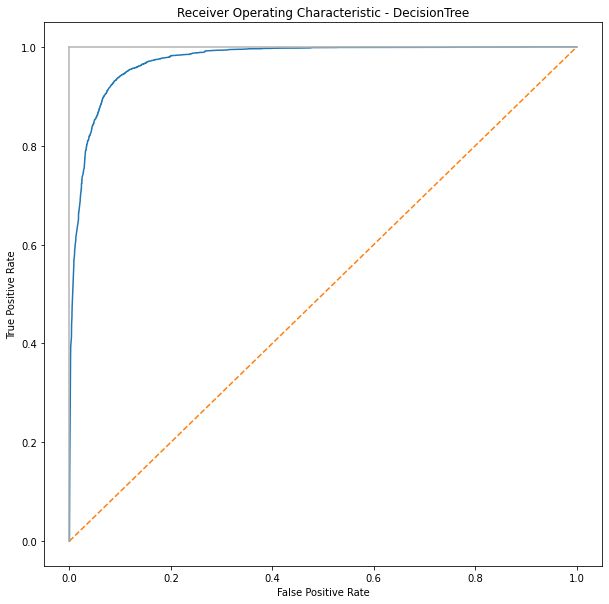

In [ ]:
    # Plot ROC curves
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


In [ ]:
y_train_proba = clf_grid.predict_proba(X_train)[:,1]
y_test_proba = clf_grid.predict_proba(X_test)[:,1]

In [ ]:
# Ganancia
# TP = 4900
# FP = -100

In [ ]:
df_pred = pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred,"prob_a": y_test_proba} )
df_pred.head()

,y_test,y_test_pred,prob_a
293857,1,1,0.924389
215476,1,1,0.957591
283835,1,1,0.843396
313099,1,1,0.779312
2818,0,0,0.006969


In [ ]:
# Calculo ganancia
#df_pred['profit'] = df_pred['y_test_pred']*(-100)+df_pred['y_test_pred']*df_pred['y_test']*5000
df_pred['profit'] = (-100) + df_pred['y_test']*5000
df_pred.head()

,y_test,y_test_pred,prob_a,profit
293857,1,1,0.924389,4900
215476,1,1,0.957591,4900
283835,1,1,0.843396,4900
313099,1,1,0.779312,4900
2818,0,0,0.006969,-100


In [473]:
df_pred.to_csv('/content/drive/MyDrive/ML/pred.csv')